In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [40]:
class Xperiment(object):
    
    N_PPL = 100
    N_DOLLARS = 100
    N_TICKS = 5000
    
    def __init__(self):
        self.balances = [self.N_DOLLARS] * self.N_PPL
    
    def settle_tick(self, gives_to):
        for from_, to_ in enumerate(gives_to):
            if to_ is None:
                continue
            self.balances[from_] -= 1
            self.balances[to_] += 1
    
    def tick(self, give_to_self=True):
        gives_to = []
        for person, balance in enumerate(self.balances):
            if balance == 0:
                gives_to.append(None)
            elif give_to_self:
                gives_to.append(np.random.choice(self.N_PPL))
            else:
                to_0 = np.random.choice(self.N_PPL - 1)
                to_0 += to_0 >= person
                gives_to.append(to_0)
        else:
            self.settle_tick(gives_to)
    
    def run(self, give_to_self=False, balances=None):
        self.balances = list(balances) if balances is not None else [self.N_DOLLARS] * self.N_PPL
        for i in range(self.N_TICKS):
            self.tick(give_to_self=give_to_self)
            
    def run_exp_series(self, n_mc, **kwargs):
        bals = pd.Series(0, index=range(self.N_PPL))
        for i in range(n_mc):
            self.run(**kwargs)
            bals += self.balances
        else:
            bals /= n_mc
        return bals
    
    def plot(self, sort=True):
        y = pd.Series(sorted(self.balances) if sort else self.balances)
        ax = y.plot(kind='bar', figsize=(20, 5))
        title = 'SITUATION AFTER {} TICKS'.format(self.N_TICKS)
        if sort:
            title += ' - SORTED'
        ax.set(title=title)
    
    def plot_2(self, y, sort=False, title=''):
        if sort:
            y = pd.Series(sorted(y))
        else:
            y = pd.Series(y)    
        ax = y.plot(kind='bar', figsize=(20, 5))
        if sort:
            title += ' - SORTED'
        ax.set(title=title)

# 1 EXPERIMENT

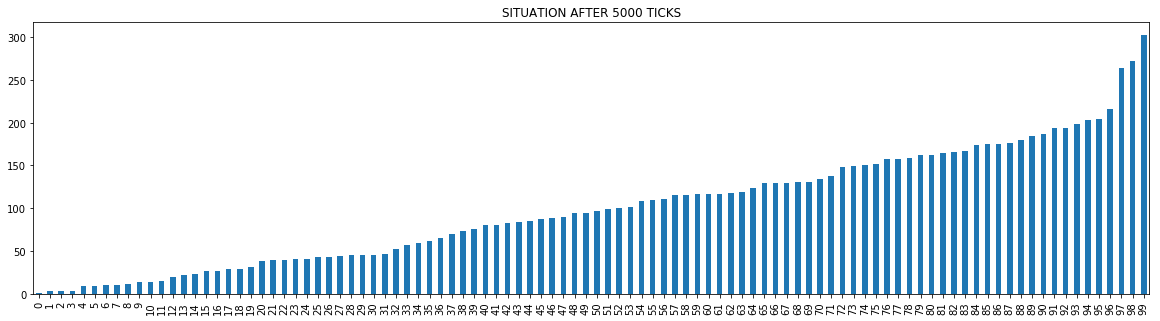

In [15]:
x = Xperiment()
x.run(give_to_self=False)
x.plot()

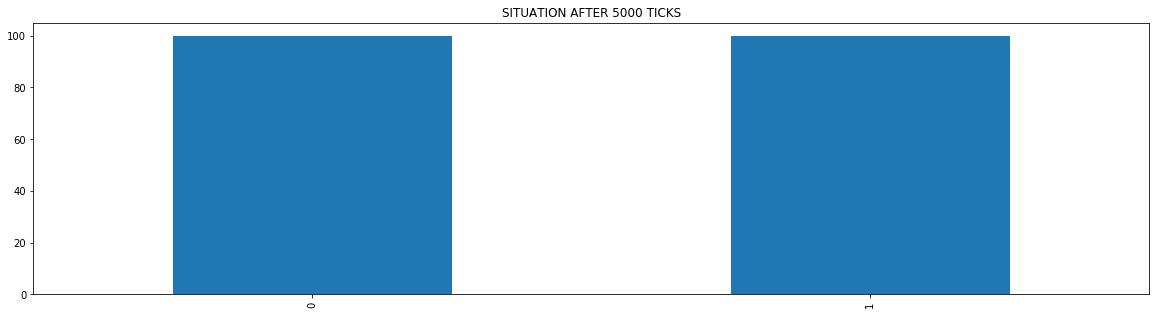

In [7]:
x = Xperiment()
x.N_PPL = 2
x.run(give_to_self=False)
x.plot()

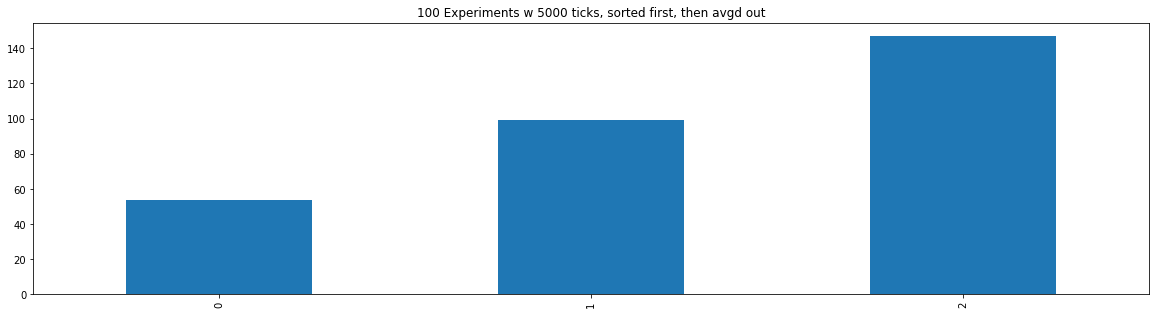

In [10]:
N_MC = 100
give_to_self = False
for i in range(N_MC):
    x = Xperiment()
    x.N_PPL = 3
    x.run(give_to_self=give_to_self)
    if i == 0:
        ys = pd.Series(sorted(x.balances))
    else:
        ys += pd.Series(sorted(x.balances))
        
ys /= N_MC
ax = ys.plot(kind='bar', figsize=(20, 5))
ax.set_title('{} Experiments w {} ticks, sorted first, then avgd out'.format(N_MC, x.N_TICKS));

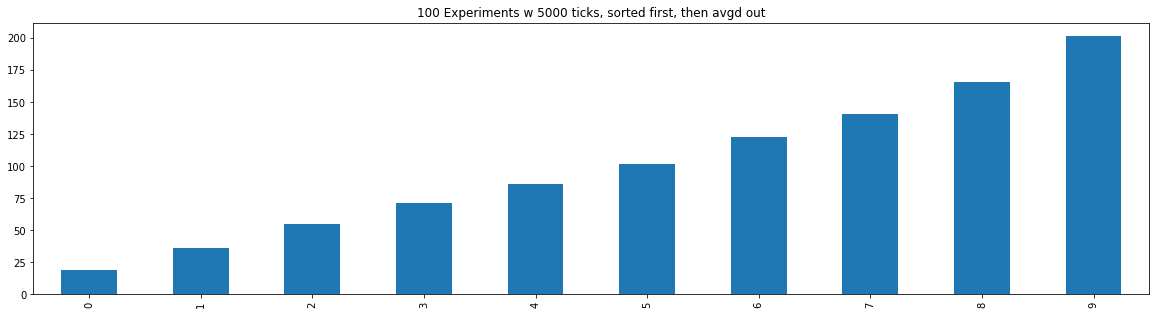

In [11]:
N_MC = 100
give_to_self = False
for i in range(N_MC):
    x = Xperiment()
    x.N_PPL = 10
    x.run(give_to_self=give_to_self)
    if i == 0:
        ys = pd.Series(sorted(x.balances))
    else:
        ys += pd.Series(sorted(x.balances))
        
ys /= N_MC
ax = ys.plot(kind='bar', figsize=(20, 5))
ax.set_title('{} Experiments w {} ticks, sorted first, then avgd out'.format(N_MC, x.N_TICKS));

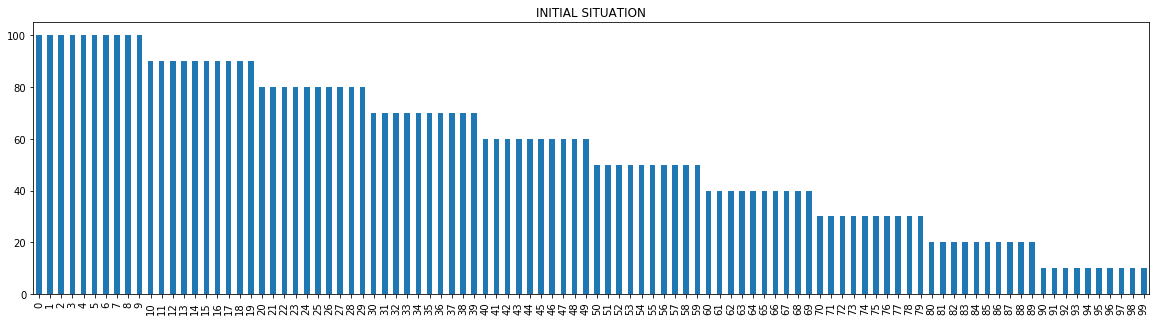

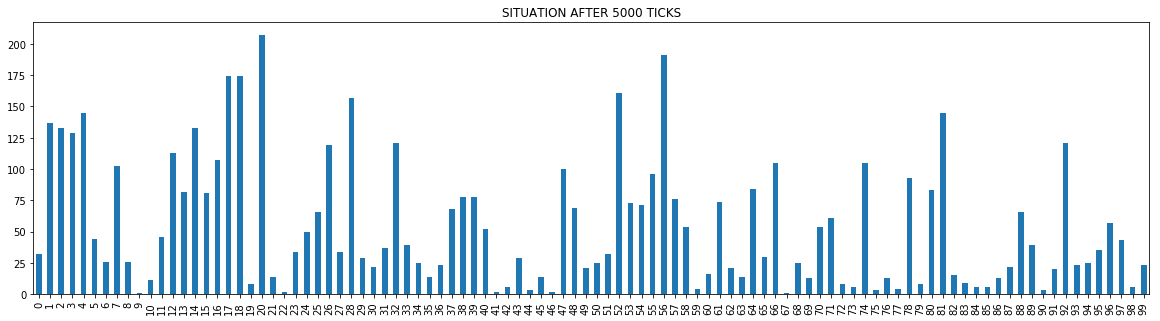

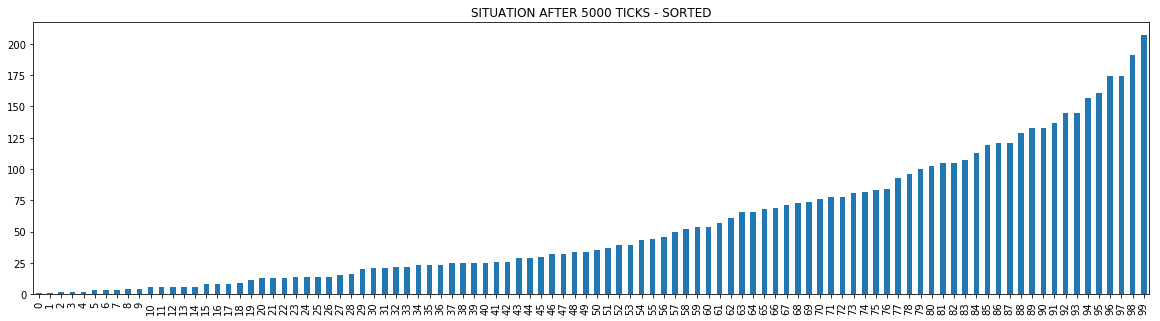

In [35]:
x = Xperiment()
balances = tuple(100 - i // 10 * 10 for i in range(100))
ax = pd.Series(balances).plot(kind='bar', figsize=(20, 5))
ax.set(title='INITIAL SITUATION')
plt.show()
x.run(give_to_self=False, balances=balances)
x.plot(sort=False)
plt.show()
x.plot(sort=True)

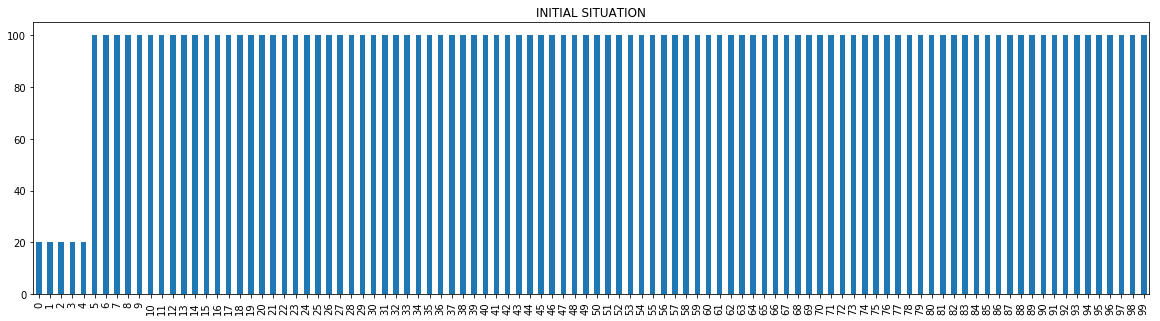

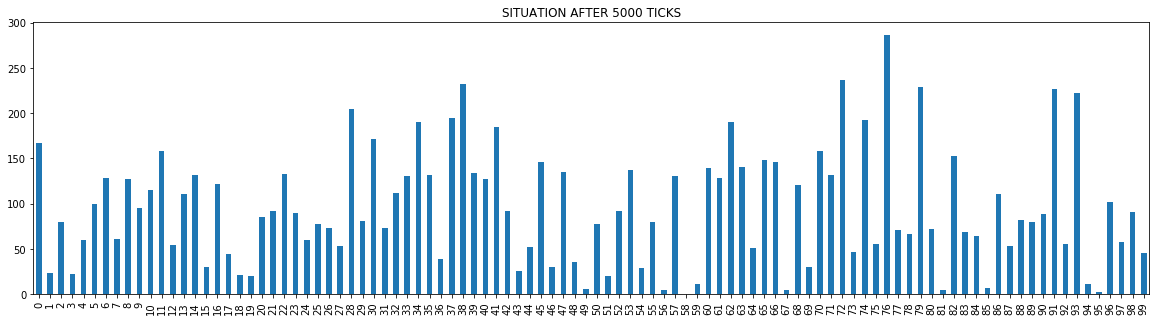

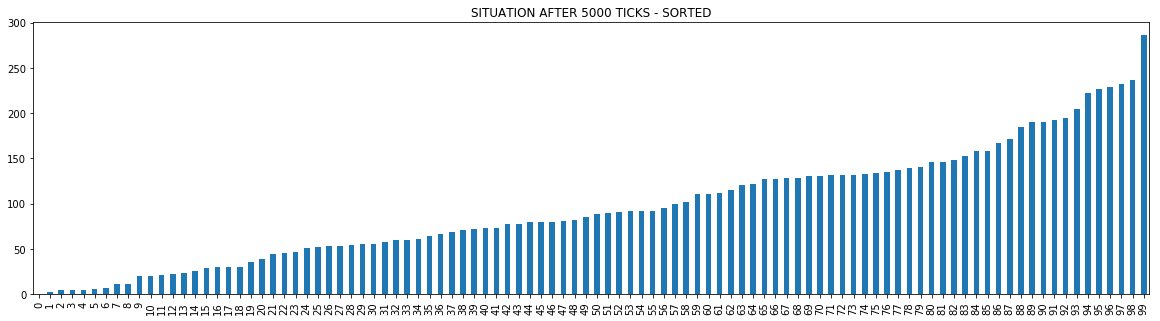

In [38]:
x = Xperiment()
balances = tuple([20]*5 + [100]*95)
ax = pd.Series(balances).plot(kind='bar', figsize=(20, 5))
ax.set(title='INITIAL SITUATION')
plt.show()
x.run(give_to_self=False, balances=balances)
x.plot(sort=False)
plt.show()
x.plot(sort=True)

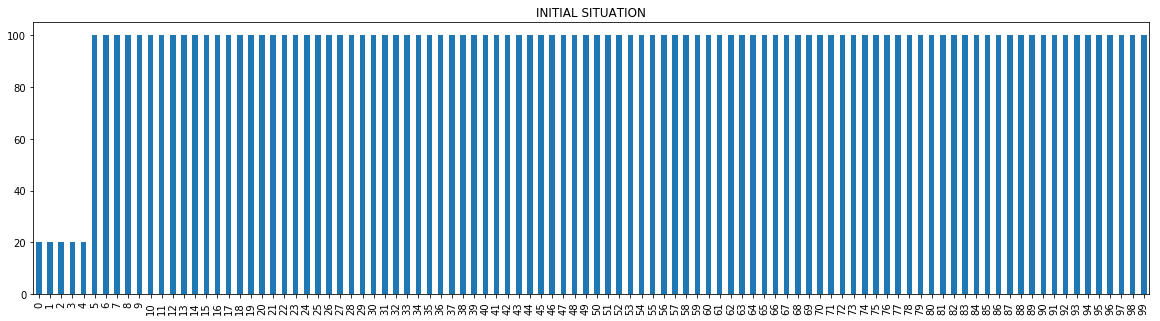

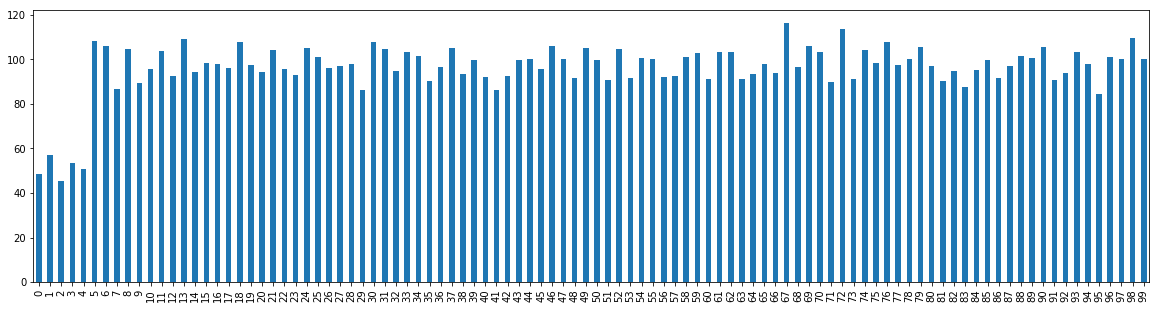

In [42]:
x = Xperiment()
balances = tuple([20]*5 + [100]*95)
ax = pd.Series(balances).plot(kind='bar', figsize=(20, 5))
ax.set(title='INITIAL SITUATION')
plt.show()
outcome = x.run_exp_series(n_mc=100, give_to_self=False, balances=balances)
x.plot_2(outcome, title='{} experiments avgd out'.format(n_mc))

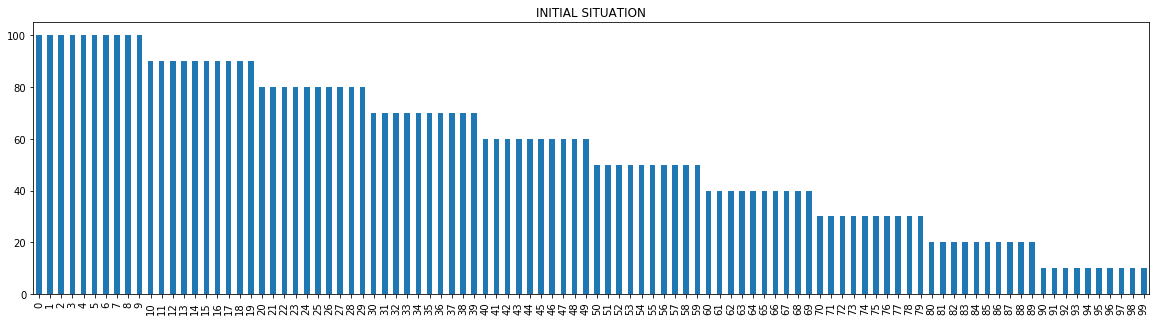

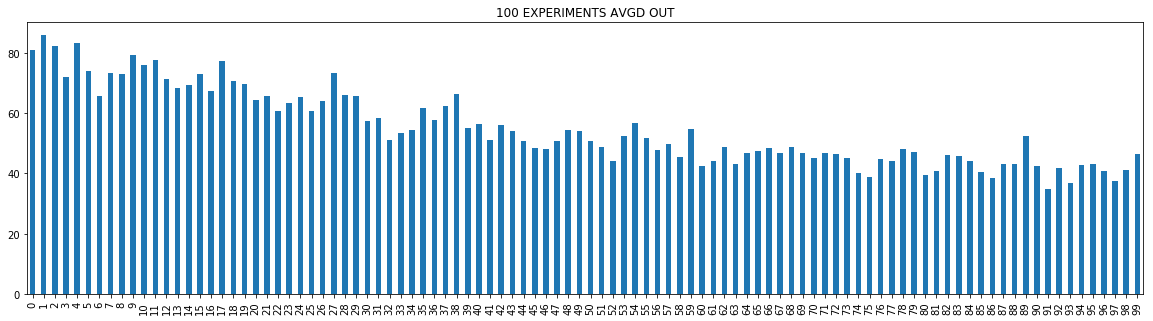

In [46]:
x = Xperiment()
balances = tuple(100 - i // 10 * 10 for i in range(100))
ax = pd.Series(balances).plot(kind='bar', figsize=(20, 5))
ax.set(title='INITIAL SITUATION')
plt.show()
n_mc = 100
outcome = x.run_exp_series(n_mc=n_mc, give_to_self=False, balances=balances)
x.plot_2(outcome, title='{} experiments avgd out'.format(n_mc).upper())

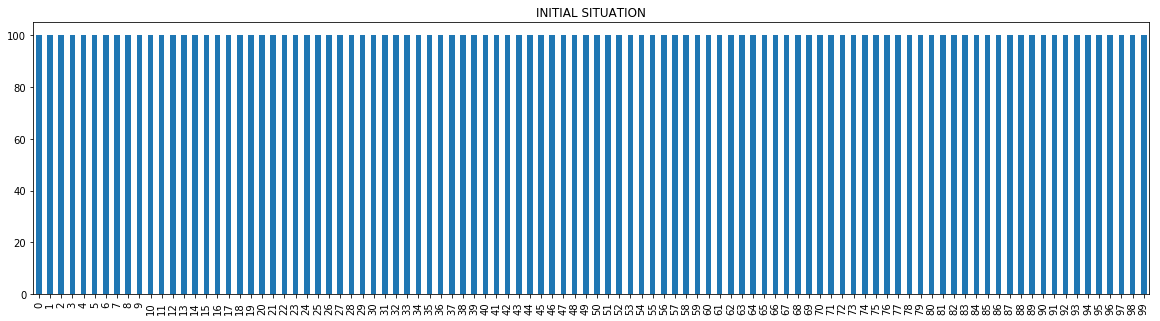

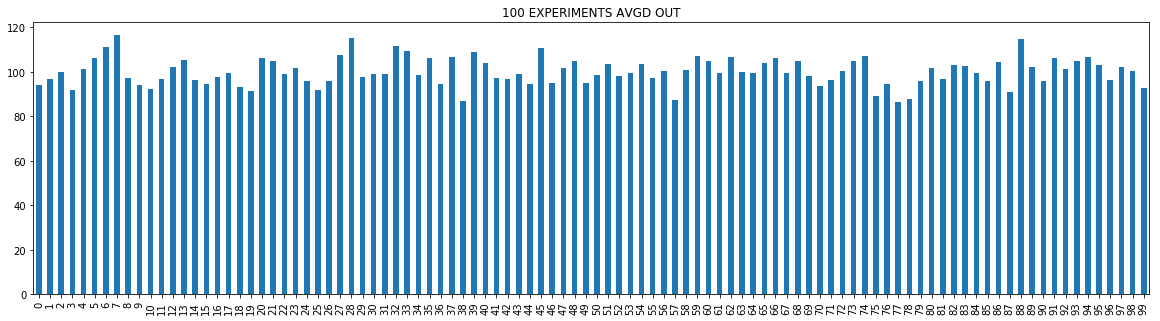

In [47]:
x = Xperiment()
balances = tuple([100]*100)
ax = pd.Series(balances).plot(kind='bar', figsize=(20, 5))
ax.set(title='INITIAL SITUATION')
plt.show()
n_mc = 100
outcome = x.run_exp_series(n_mc=n_mc, give_to_self=False, balances=balances)
x.plot_2(outcome, title='{} experiments avgd out'.format(n_mc).upper())

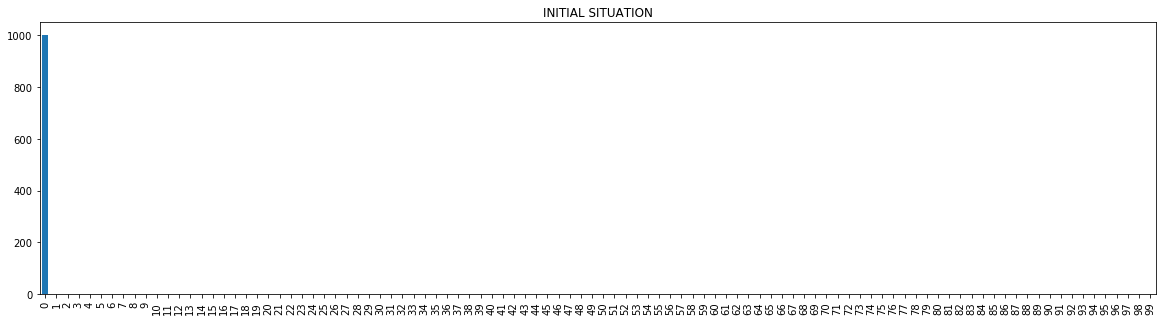

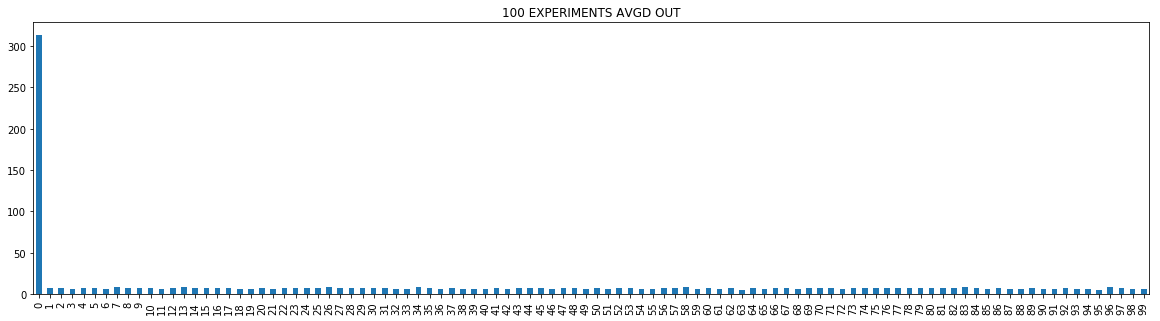

In [51]:
x = Xperiment()
balances = tuple([100*10] + [0]*99)
ax = pd.Series(balances).plot(kind='bar', figsize=(20, 5))
ax.set(title='INITIAL SITUATION')
plt.show()
n_mc = 100
outcome = x.run_exp_series(n_mc=n_mc, give_to_self=False, balances=balances)
x.plot_2(outcome, title='{} experiments avgd out'.format(n_mc).upper())

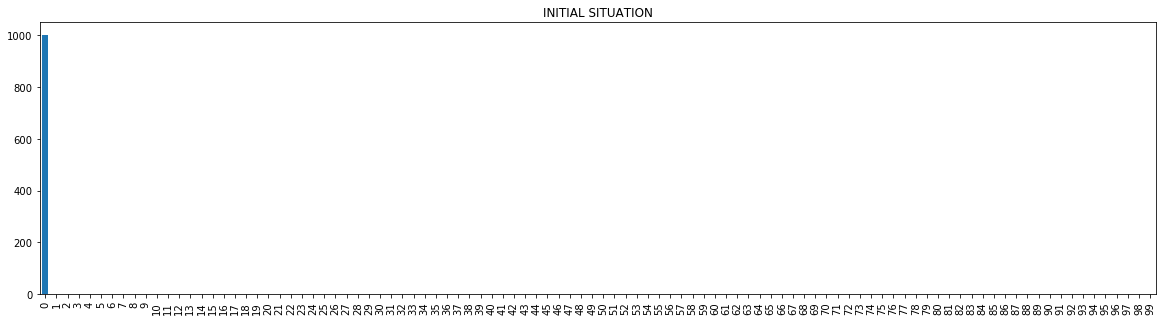

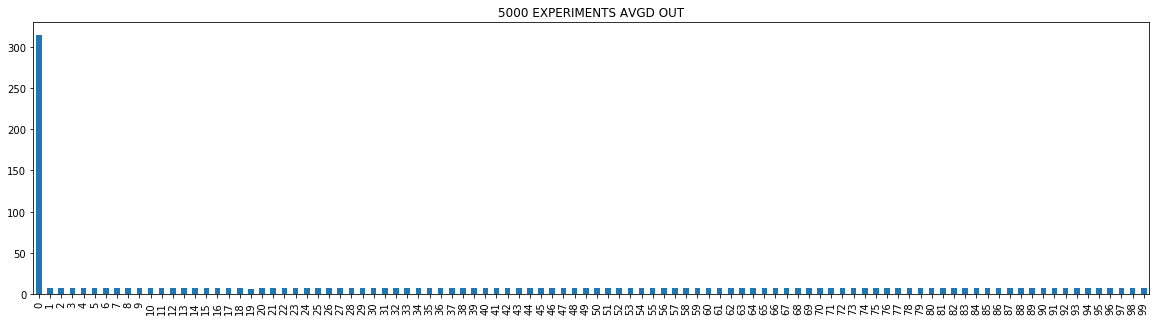

In [52]:
x = Xperiment()
balances = tuple([100*10] + [0]*99)
ax = pd.Series(balances).plot(kind='bar', figsize=(20, 5))
ax.set(title='INITIAL SITUATION')
plt.show()
n_mc = 5000
outcome = x.run_exp_series(n_mc=n_mc, give_to_self=False, balances=balances)
x.plot_2(outcome, title='{} experiments avgd out'.format(n_mc).upper())